In [49]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.model_selection import train_test_split

import urllib

In [50]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

rcParams['figure.figsize'] = (8,8)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
factor = 1
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi*factor

In [60]:
# Напишем функцию линейной регрессии

def linear_model(x, b, a):
    """Linear model of the form y = b * x + a"""
    y = a + b * x
    return y

In [52]:
# загружаем данные
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")
data = np.genfromtxt('data.csv', delimiter=',')

In [53]:
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [54]:
# получаем значения x и y
x = np.array(data[:20,0])
y = np.array(data[:20,1])


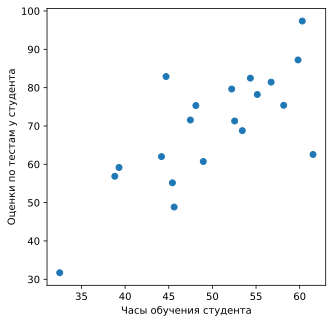

In [55]:
# нарисуем dataset
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.xlabel('Часы обучения студента')
plt.ylabel('Оценки по тестам у студента')
plt.show()

In [61]:
b = 1
a = -1

pred_y = linear_model(x, b, a)
pred_y

array([31.50234527, 52.42680403, 60.53035803, 46.47563963, 58.81320787,
       54.14218841, 51.21179669, 38.29956669, 47.10504169, 51.55001444,
       44.41973014, 53.35163488, 43.1640495 , 57.16847072, 55.72720806,
       47.95588857, 43.68719623, 59.29732685, 44.61864377, 37.81681754])

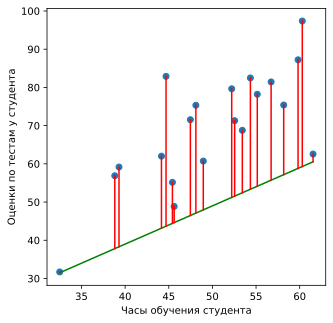

In [62]:
# нарисуем dataset
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.plot(x,pred_y, color='green')


plt.plot(np.vstack([x,x]), np.vstack([y, pred_y]), color="red");


plt.xlabel('Часы обучения студента')
plt.ylabel('Оценки по тестам у студента')
plt.show()

In [29]:
# посчитаем ошибку предсказания MAE

round(mean_absolute_error(y, pred_y),2), round(mean_squared_error(y, pred_y),2)

(118.4, 14460.94)

In [30]:
x[:,np.newaxis]

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754]])

In [31]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

In [32]:
model = LinearRegression() # scikit-learn, linear
model.fit(x[:,np.newaxis], y) # обучение

LinearRegression()

In [33]:
pred_y_m=model.predict(x[:, np.newaxis]) # предказание

In [35]:
round(mean_absolute_error(y, pred_y_m), 2), round(mean_squared_error(y, pred_y_m),2)

(7.88, 98.58)

In [37]:
round(mean_squared_error(y, pred_y_m)**(1/2), 2)

9.93

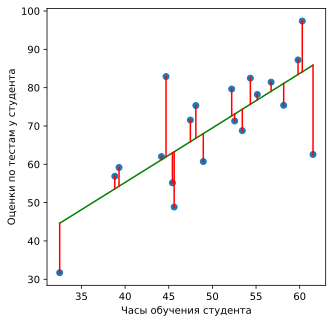

In [38]:
# нарисуем dataset
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.plot(x,pred_y_m, color='green')


plt.plot(np.vstack([x,x]), np.vstack([y, pred_y_m]), color="red");


plt.xlabel('Часы обучения студента')
plt.ylabel('Оценки по тестам у студента')
plt.show()

In [40]:
model.coef_ # бэта или b

array([1.42122097])

In [41]:
model.intercept_ # альфа или а

-1.574516297588218

In [64]:
print(f'мы построили линейную регрессию y = {round(model.intercept_,2)} + {round(model.coef_[0], 2)}*x')

мы построили линейную регрессию y = -1.57 + 1.42*x
